# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Loading Data

In [ ]:
dir_data = '/content/drive/MyDrive/Colab Notebooks/Papers/U-Net/data'
name_label = 'train-labels.tif'
name_input = 'train-volume.tif'

img_label = Image.open(os.path.join(dir_data, name_label))
img_input = Image.open(os.path.join(dir_data, name_input))

ny, nx = img_label.size
nframe = img_label.n_frames

# Defining paramaters for spliting dataset

In [ ]:
nframe_train = 24
nframe_val = 3
nframe_test = 3

# Defining a directory to store data

In [ ]:
dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')

if not os.path.exists(dir_save_train):
  os.makedirs(dir_save_train)
if not os.path.exists(dir_save_val):
  os.makedirs(dir_save_val)
if not os.path.exists(dir_save_test):
  os.makedirs(dir_save_test)

# Spliting Training data, Validation data, and Test data

In [ ]:
id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

In [ ]:
# Training Data
offset_nframe = 0
for i in range(nframe_train):
  img_label.seek(id_frame[i+offset_nframe])
  img_input.seek(id_frame[i+offset_nframe])

  label_ = np.asarray(img_label)
  input_ = np.asarray(img_input)

  np.save(os.path.join(dir_save_train, 'label_%03d.npy' %i), label_)
  np.save(os.path.join(dir_save_train, 'input_%03d.npy' %i), input_)

In [ ]:
# Validation Data
offset_nframe += nframe_train
for i in range(nframe_val):
  img_label.seek(id_frame[i+offset_nframe])
  img_input.seek(id_frame[i+offset_nframe])

  label_ = np.asarray(img_label)
  input_ = np.asarray(img_input)

  np.save(os.path.join(dir_save_val, 'label_%03d.npy' %i), label_)
  np.save(os.path.join(dir_save_val, 'input_%03d.npy' %i), input_)

In [ ]:
# Test Data
offset_nframe += nframe_val
for i in range(nframe_test):
  img_label.seek(id_frame[i+offset_nframe])
  img_input.seek(id_frame[i+offset_nframe])

  label_ = np.asarray(img_label)
  input_ = np.asarray(img_input)

  np.save(os.path.join(dir_save_test, 'label_%03d.npy' %i), label_)
  np.save(os.path.join(dir_save_test, 'input_%03d.npy' %i), input_)

# Visualizing Data

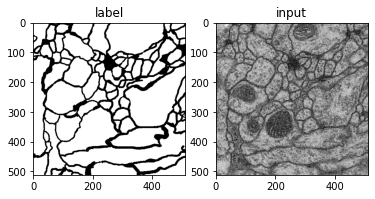

In [ ]:
plt.subplot(121)
plt.imshow(label_, cmap='gray')
plt.title('label')

plt.subplot(122)
plt.imshow(input_, cmap='gray')
plt.title('input')

plt.show()